# ADD SMA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import useful_functions as uf
import classification_report_generator as crg
from ta.trend import SMAIndicator

In [3]:
# df = pd.read_csv("../data/BTCUSDT-hour-target.csv")
# df = pd.read_csv("../data/BTCUSDT-hour-target.csv") #Starting
df = pd.read_csv("../data/BTCUSDT-hour-target-features.csv") #Default progression


In [4]:
def variations(windows:list[int]):
    """
    returns variations of atr indicator with given windows
    """
    name = "sma_"
    for w in windows:
        i = SMAIndicator(df.close, window=w)
        sma_name = name + str(w)
        df[sma_name] = i.sma_indicator()
        df[sma_name + "_o_close"] = list(map(lambda s, c: s/c, df[sma_name], df.close))
        df[sma_name + "_o_close_log"] = list(map(lambda x: uf.log_abs(x, zeros=True), df[sma_name + "_o_close"]))
        df[sma_name + "_diff"] = list(map(lambda s, c:c-s, df[sma_name], df.close))
        df[sma_name + "_diff_o_close"] = list(map(lambda s, c: s/c, df[sma_name + "_diff"], df.close))
        df[sma_name + "_diff_log_o_close_log"] = list(map(lambda d, c: uf.log_abs(d)/uf.log_abs(c), df[sma_name + "_diff"], df.close))
        df[sma_name + "_rate"] = uf.get_rate(df[sma_name])
#         df[sma_name + "_rate_o_close"] = list(map(lambda r, c: r/c, df[sma_name + "_rate"], df.close))
        df[sma_name + "_rate_log"] = list(map(lambda x: uf.log_abs(x, zeros=True), df[sma_name + "_rate"]))
#         df[sma_name + "_diff_o_close_rate"] = uf.get_rate(df[sma_name + "_diff_o_close"])


In [5]:
variations([20, 50, 200])

In [6]:
indicators = list(df.columns)
print(len(indicators))
for n in [20, 50, 200, 1000]:
    for name in ["sma_"]:
        for suffix in ["", "_rate", "_diff"]:
            if name + str(n) + suffix in indicators:
                indicators.remove(name + str(n) + suffix)
len(indicators)

48


39

In [7]:
df = df[list(indicators)].copy()

In [8]:
# df = df[list(indicators)[13:]].copy()
# df

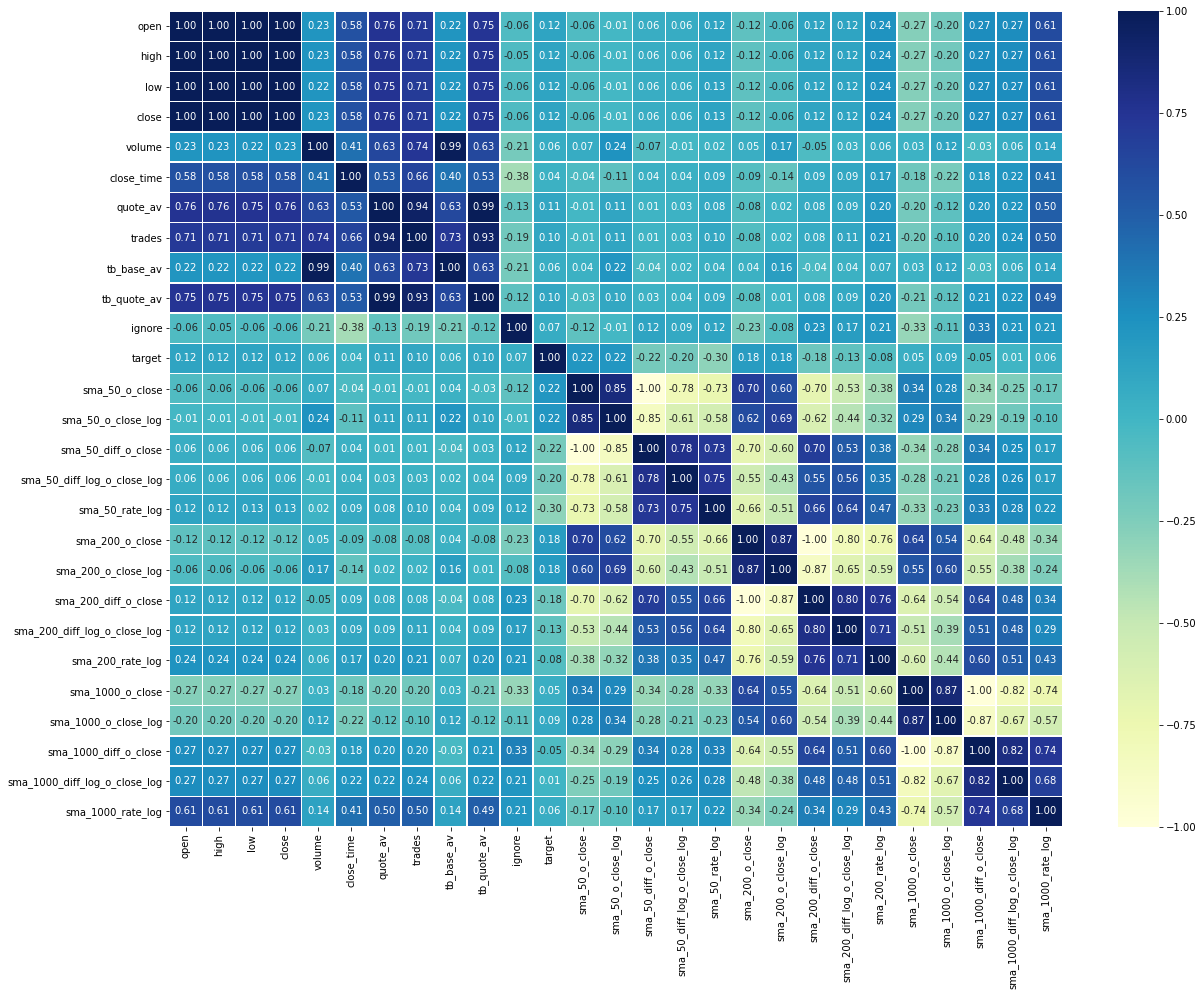

In [210]:

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

In [9]:
df.to_csv("../data/BTCUSDT-hour-target-features.csv", index=False) #Default